# Applying logistic regression and SVM

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set()

In [3]:
from sklearn.datasets import load_wine

In [4]:
wine = load_wine()

In [5]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

## LogisticRegression example
<p><b>Logistic Regression (aka logit, MaxEnt) classifier</b></p>

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
log_reg = LogisticRegression()

In [8]:
log_reg.fit(wine.data, wine.target)

LogisticRegression()

In [9]:
log_reg.score(wine.data, wine.target)

0.9662921348314607

# Using LinearSVC
<p><b>In scikit-learn, the basic SVM classifier is called LinearSVC for linear support vector classifier.</b></p>

In [10]:
from sklearn.svm import LinearSVC

In [11]:
svm = LinearSVC()

In [12]:
svm.fit(wine.data, wine.target)

LinearSVC()

In [13]:
svm.score(wine.data, wine.target)

0.9269662921348315

# Using SVC
<p><b>We can repeat these steps again for the "SVC" class, which fits a nonlinear SVM by default.</b></p>

In [14]:
from sklearn.svm import SVC

In [15]:
svm = SVC()

In [16]:
svm.fit(wine.data, wine.target)

SVC()

In [17]:
svm.score(wine.data, wine.target)

0.7078651685393258

# Linear decision boundaries
<p><b>A decision boundary tells us what class our classifier will predict for any value of x.</b></p>

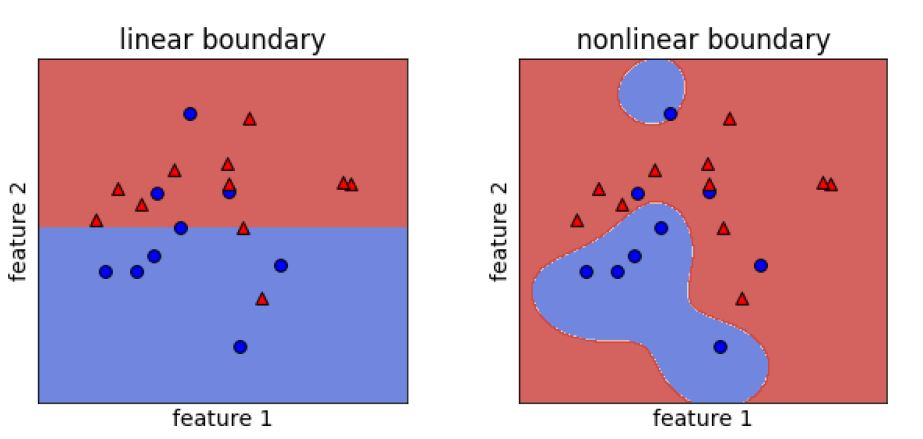

<p><b>the classifier predicts the blue class in the blue shaded area, where feature 2 is small, and the red class in the red shaded area, where feature 2 is large. The dividing line between the two regions is called the decision boundary. This decision boundary is considered linear because it looks like a line. The line doesn't have to be horizontal; it could be in any orientation. This definition extends to more than 2 features as well.</b></p>
<p><b>A nonlinear boundary is any other type of boundary. Sometimes this leads to non-contiguous regions of a certain prediction, like in the figure. <u>In their basic forms, logistic regression and SVMs are linear classifiers, which means they learn linear decision boundaries</u>.</b></p>

# Definitions
<ul>
    <li><b>Classification:</b> learning to predict categories.</li>
    <li><b>Decision Boundary:</b> the surface separating different predicted classes.</li>
    <li><b>Linear Classifier:</b> a classifier that learns linear decision boundaries. Example: logistic regression, linear SVM</li>
    <li><b>Linearly Separable:</b> a data set can be perfectly explained by a linear classifier.</li>
</ul>

# Linearly separable data

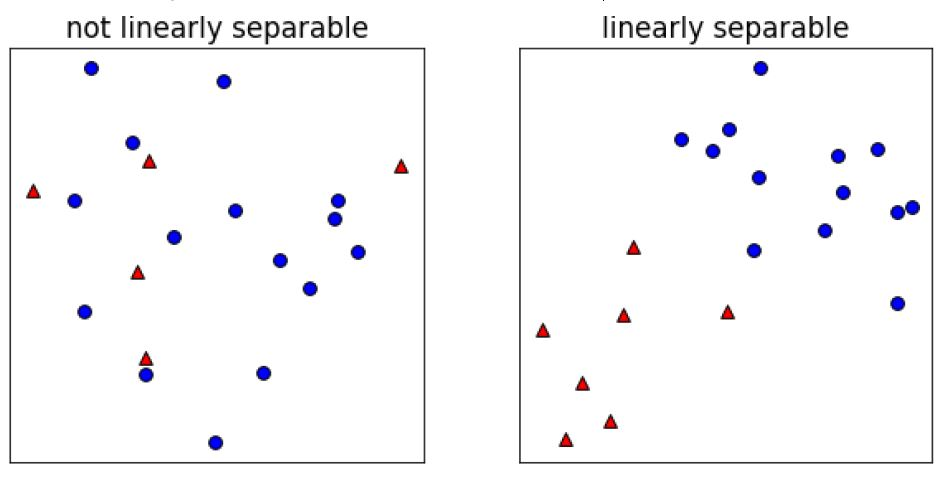

# Linear classifiers: prediction equations

## Dot Products

In [18]:
x = np.arange(1,5)
y = np.arange(5,9)

In [19]:
print(x)
print(y)

[1 2 3 4]
[5 6 7 8]


In [20]:
print(x*y)

[ 5 12 21 32]


In [21]:
print(np.sum(x*y))

70


In [22]:
print(x@y) # x@y is called the dot product of x and y , and is written x.y

70


## Linear classifier prediction
<p><b>
    <ul>
        <li>raw model output = coefficients ⋅ features + intercept</li>
        <li>Linear classifier prediction: compute raw model output, check the sign
            <ul>
                <li>if positive, predict one class</li>
                <li>if negative, predict the other class</li>
            </ul>
        </li>
        <li>This is the same for logistic regression and linear SVM</li>
        <li>fit is different but predict is the same</li>
    </ul>
    </b></p>

# What is a loss function?
<p><b>Many machine learning algorithms involve minimizing a loss, and by understanding this perspective you'll be equipped with the tools to see connections between models, quickly grasp new ones, and start tailoring them to your data science problem.</b></p>
<p><b>We can think of minimizing the loss as jiggling around the coefficients, or parameters of the model until this error term, or loss function, is as small as possible. In other words, the loss function is a penalty score that tells us how well (or, to be precise, how poorly) the model is doing on the training data. We can think of the "fit" function as running code that minimizes the loss.</b></p>

# Least squares: the squared loss
<p><b>
    <ul>
<li>scikit-learn's LinearRegression minimizes a loss:
    Sigma(∑) i = 1 to n  (true ith target value − predicted ith target value)^2</li>
        <li>Minimization is with respect to coe)cients or parameters of
            the model.</li>
<li>Note that in scikit-learn model.score() isn't necessarily the
    loss function.</li>
    </ul>
    </b></p>
    
# Classification errors: the 0-1 loss
<p><b>
    <ul>
        <li>Squared loss not appropriate for classification problems</li>
<li>A natural loss for classification problem is the number of
    errors.</li>
<li>This is the 0-1 loss: it's 0 for a correct prediction and 1 for an
    incorrect prediction.</li>
        <li>But this loss is hard to minimize!</li>

# Minimizing a loss function

In [23]:
# In this exercise will implement linear regression "from scratch" using scipy.optimize.minimize.

In [24]:
from sklearn.datasets import load_boston

In [25]:
boston = load_boston()

In [26]:
X = boston.data
y = boston.target

In [27]:
from scipy.optimize import minimize

In [28]:
# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

In [29]:
# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

[-9.28967297e-02  4.87153175e-02 -4.05723042e-03  2.85399119e+00
 -2.86835054e+00  5.92815219e+00 -7.26944750e-03 -9.68513678e-01
  1.71156278e-01 -9.39664456e-03 -3.92187072e-01  1.49054687e-02
 -4.16304299e-01]


In [30]:
# Compare with scikit-learn's LinearRegression coefficients
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


# Loss function diagrams

In [31]:
# Comparing the logistic and hinge losses

In [32]:
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

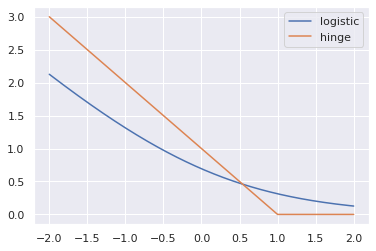

In [33]:
# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

# Implementing logistic regression

In [34]:
from sklearn.datasets import load_breast_cancer

In [35]:
cancer = load_breast_cancer()

In [36]:
X = cancer.data
y = cancer.target

In [37]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(cancer.target.size):
        raw_model_output = w@cancer.data[i]
        s = s + log_loss(raw_model_output * cancer.target[i])
    return s

In [38]:
# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, cancer.data[0]).x
print(w_fit)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [39]:
# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(cancer.data,cancer.target)
print(lr.coef_)

[[ 1.10312979  0.52457853  0.25496444 -0.01644329 -0.04184917 -0.19559038
  -0.27364547 -0.11540234 -0.05793569 -0.01161625  0.04844257  0.4425685
   0.18380652 -0.13132233 -0.00375932 -0.0418264  -0.05833738 -0.01498333
  -0.01398649 -0.00389512  1.17310704 -0.58170237 -0.24927134 -0.01497433
  -0.07569695 -0.60848338 -0.75733585 -0.2217234  -0.18307159 -0.05869417]]


# Logistic regression and regularization

### Regularized logistic regression

<p><b>Regularization combats overfitting by making the model coefficients smaller. In scikit-learn, the hyperparameter "C" is the inverse of the regularization strength. In other words, larger C means less regularization and smaller C means more regularization. Let's test this out.</b></p>

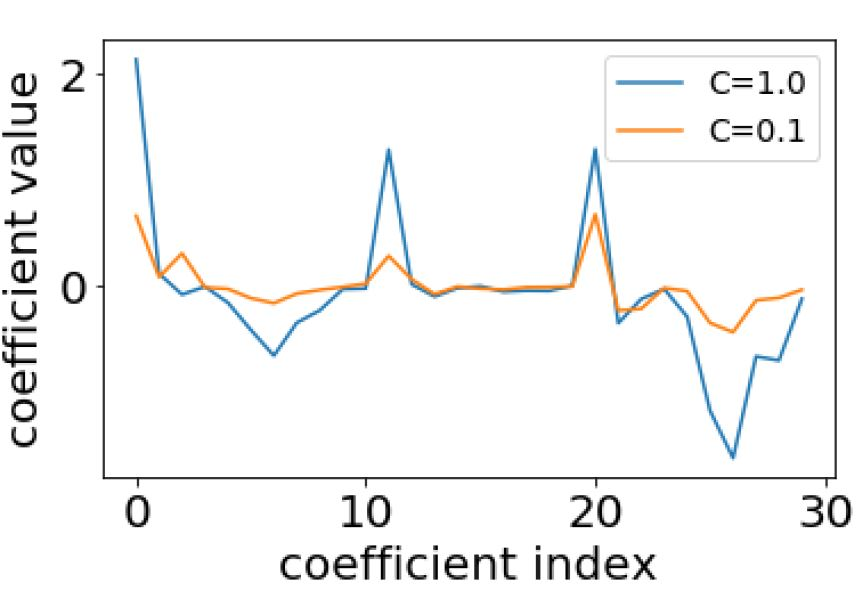

<p><b>The orange curve shows what happens if we use a smaller value of C, which means more regularization for our logistic regression model. As expected, regularization makes the coefficients smaller.</b></p>

### How does regularization affect training accuracy?

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Let's split cancer data into train and test sets and initialize two LogisticRegression models.
# One with weak regularization and one with strong regularization.

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

In [42]:
lr_weak_reg = LogisticRegression(C = 100)
lr_strong_reg = LogisticRegression(C = 0.01)

In [43]:
lr_weak_reg.fit(X_train, y_train)
lr_strong_reg.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [44]:
print(lr_weak_reg.score(X_train, y_train))
print(lr_strong_reg.score(X_train, y_train))

0.9530516431924883
0.9366197183098591


<strong>The model with weak regularization gets a higher training accuracy.</strong>
<p><b>Now that we've studied loss functions, we can see why regularization makes the training accuracy go down: Regularization is an extra term that we add to the original loss function, which penalizes large values of the coefficients. Intuitively, without regularization, we are maximizing the training accuracy, so we do well on that metric. When we add regularization, we're modifying the loss function to penalize large coefficients, which distracts from the goal of optimizing accuracy. The larger the regularization penalty (or the smaller we set C), the more we deviate from our goal of maximizing training accuracy. Hence, training accuracy goes down.</b></p>

### How does regularization affect test accuracy?

In [45]:
print(lr_weak_reg.score(X_test, y_test))
print(lr_strong_reg.score(X_test, y_test))

0.9440559440559441
0.916083916083916


<strong>Let's look at the test accuracy this time. As we can see, regularization improved it. We discussed why regularization reduces training accuracy, but why does it improve test accuracy? Imagine you did not have access to a particular feature; that's like setting the corresponding coefficient to zero. Regularizing, and thus making your coefficient smaller, is like a compromise between not using the feature at all (setting the coefficient to zero) and fully using it (the un-regularized coefficient value). If using a feature too heavily was causing overfitting, then regularization causes you to "fit less" and thus overfit less.</strong>

### L1 vs. L2 regularization
<ul>
    <li>Lasso = linear regression with L1 regularization</li>
    <li>Ridge = linear regression with L2 regularization</li>
    <li>For other models like logistic regression we just say L1, L2, etc.</li>
    </ul>

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scl = StandardScaler()

In [48]:
X_train_scaled = scl.fit_transform(X_train)

In [49]:
lr_L1 = LogisticRegression(penalty='l1', solver='liblinear')
lr_L2 = LogisticRegression() #penalty='l2' by default

In [50]:
lr_L1.fit(X_train_scaled, y_train)
lr_L2.fit(X_train_scaled, y_train)

LogisticRegression()

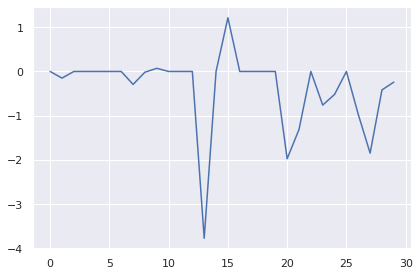

In [51]:
_ = plt.plot(lr_L1.coef_.flatten())
_ = plt.tight_layout()
_ = plt.show()

<p><b>L1 regularization set many of the coefficients to zero, thus ignoring those features; in other words, it performed feature selection for us.</b></p>

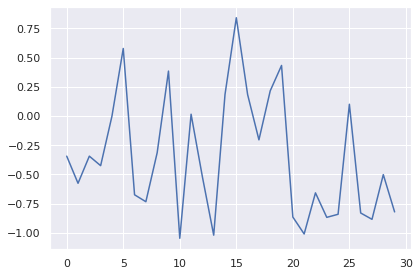

In [52]:
_ = plt.plot(lr_L2.coef_.flatten())
_ = plt.tight_layout()
_ = plt.show()

<p><b>L2 regularization just shrinks the coefficients to be smaller.</b></p>

# Regularized logistic regression

In [53]:
from sklearn.datasets import load_digits

In [54]:
digits = load_digits()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [56]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1347, 64) (450, 64) (1347,) (450,)


In [57]:
# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

In [58]:
# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C = C_value, max_iter=1000)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_test, y_test) )

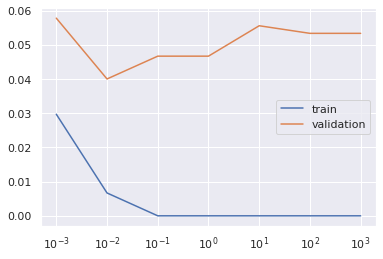

In [59]:
# Plot results
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

<p><b>Too much regularization (small C) doesn't work well - due to underfitting - and too little regularization (large C) doesn't work well either - due to overfitting.</b></p>

# Logistic regression and probabilities
<p><b>So far we've been using logistic regression to make hard predictions, meaning we predict either one class or the other. Let's discuss how to interpret the raw model output of the classifier as a probability</b></p>

In [60]:
X_train = cancer.data
y_train = cancer.target

In [61]:
lr = LogisticRegression(C = 1000000)

In [62]:
lr.fit(X_train, y_train)

LogisticRegression(C=1000000)

In [63]:
coef = lr.coef_
print(coef)

[[ 1.11577746  0.54839378  0.2665068  -0.01812275 -0.04224744 -0.1975684
  -0.2764897  -0.11657125 -0.05858733 -0.01172918  0.04893326  0.4476167
   0.18393233 -0.12128812 -0.00379284 -0.04229398 -0.05900954 -0.01513646
  -0.0141307  -0.00394413  1.18602678 -0.58162141 -0.27828198 -0.01280727
  -0.07646679 -0.61530154 -0.76598431 -0.22405455 -0.18524193 -0.05939621]]


In [64]:
lr.intercept_

array([0.20347259])

In [65]:
lr.predict_proba(X_train)

array([[1.00000000e+00, 1.01986827e-15],
       [9.99999972e-01, 2.75283729e-08],
       [9.99999830e-01, 1.69788497e-07],
       ...,
       [9.92715199e-01, 7.28480102e-03],
       [1.00000000e+00, 5.31272604e-11],
       [1.57190911e-02, 9.84280909e-01]])

In [66]:
lr_reg = LogisticRegression(C = 1)

In [67]:
lr_reg.fit(X_train,y_train)

LogisticRegression(C=1)

In [68]:
lr_reg.coef_

array([[ 0.95759418,  0.46290208,  0.27980364, -0.01688726, -0.03563797,
        -0.16786189, -0.23502509, -0.09899274, -0.04936594, -0.0098475 ,
         0.04161307,  0.37863123,  0.14704487, -0.10854475, -0.00322369,
        -0.0360774 , -0.0502497 , -0.01288941, -0.0119164 , -0.00334971,
         1.01795433, -0.5057001 , -0.2520098 , -0.01341176, -0.06465629,
        -0.52345659, -0.65145565, -0.19047462, -0.15652036, -0.05030148]])

In [69]:
lr_reg.intercept_

array([0.17847881])

In [70]:
lr_reg.predict_proba(X_train)

array([[1.00000000e+00, 4.82210329e-15],
       [9.99999972e-01, 2.77871276e-08],
       [9.99999769e-01, 2.31128316e-07],
       ...,
       [9.92682403e-01, 7.31759711e-03],
       [1.00000000e+00, 1.53585666e-10],
       [2.13817086e-02, 9.78618291e-01]])

In [71]:
lr_reg_ = LogisticRegression(C=0.1)

In [72]:
lr_reg_.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [73]:
lr_reg_.coef_

array([[ 0.67626186,  0.08316865,  0.295007  , -0.01032023, -0.0242266 ,
        -0.11502318, -0.16151216, -0.06838683, -0.03367709, -0.00654634,
         0.0277015 ,  0.29074754,  0.07754537, -0.07387027, -0.00229085,
        -0.02389834, -0.03355777, -0.00889485, -0.00810994, -0.00214309,
         0.70844148, -0.23070401, -0.20424844, -0.01641793, -0.04436701,
        -0.35684421, -0.44346699, -0.13193248, -0.1074251 , -0.03376636]])

In [74]:
lr_reg_.intercept_

array([0.16763705])

In [75]:
lr_reg_.predict_proba(X_train)

array([[1.00000000e+00, 2.80247902e-13],
       [9.99999926e-01, 7.38536184e-08],
       [9.99999214e-01, 7.86273908e-07],
       ...,
       [9.94948581e-01, 5.05141860e-03],
       [9.99999998e-01, 2.02897617e-09],
       [1.12968363e-01, 8.87031637e-01]])

In [76]:
np.max(lr_reg_.predict_proba(X_train))

1.0

In [77]:
np.max(lr_reg.predict_proba(X_train))

1.0

# Multi-class logistic regression
<p><b>Multi-class classification means having more than 2 classes. While we've used scikit-learn to perform multi-class classification, all of our conceptual discussions have been in the binary, or 2-class, case. Let's see how multi-class classification works for linear classifiers.</b></p>

In [78]:
from sklearn.datasets import load_wine

In [79]:
wine = load_wine()

In [80]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

<p><b>We'll cover two popular approaches to multi-class classification. The first is to train a series of binary classifiers for each class. For example, I've loaded the wine dataset and instantiated 3 logistic regression classifiers.</b></p>

In [81]:
lr_0 = LogisticRegression()
lr_1 = LogisticRegression()
lr_2 = LogisticRegression()

<p><b>The code y==0 returns an array the same size as y that's True when y is 0 and False otherwise, so the classifier learns to predict these true/false values. In other words, it's a binary classifier learning to discriminate between class 0 or not 0. The next one learns y=1 vs. not 1, etc. This is called the one-vs-rest strategy. In order to make predictions using one-vs-rest, we take the class whose classifier gives the largest raw model output - or decision_function, in scikit-learn terminology.</b></p>

In [82]:
lr_0.fit(wine.data, wine.target == 0)
lr_1.fit(wine.data, wine.target == 1)
lr_2.fit(wine.data, wine.target == 2)

LogisticRegression()

In [83]:
# get raw model output
lr_0.decision_function(wine.data)[0]

5.869020017816297

In [84]:
lr_1.decision_function(wine.data)[0]

-5.408067976621872

In [85]:
lr_2.decision_function(wine.data)[0]

-7.575183207999627

<p><b>In this case, the largest raw model output comes from classifier 0. This means it's more confident that the class is 0 than any of the other classes, so we predict class 0. One-vs-rest is the default behavior of scikit-learn's LogisticRegression. We can just let scikit-learn do the work by fitting a logistic regression model on the original multi-class data set. We get the same prediction, of 0, as expected.</b></p>

In [86]:
lr_w = LogisticRegression()

In [87]:
lr_w.fit(wine.data, wine.target)

LogisticRegression()

In [88]:
lr_w.predict(wine.data)[0]

0

<p><b>Another way to achieve multi-class classification with logistic regression is to modify the loss function so that it directly tries to optimize accuracy on the multi-class problem. There are 
various words related to this, like multinomial logistic regression, softmax, or cross-entropy loss.</b></p>

In [89]:
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [90]:
lr_mn.fit(wine.data, wine.target)

LogisticRegression(multi_class='multinomial')

In [91]:
lr_mn.predict(wine.data)[0]

0

In [92]:
lr_mn.score(wine.data, wine.target)

0.9662921348314607

In [93]:
lr_w.score(wine.data, wine.target)

0.9662921348314607

<p><b>In the field of neural networks, the multinomial approach is standard. Finally, while both approaches can work for SVMs, one-vs-rest and related strategies tend to be more popular. By the way, both of these methods can output probabilities just like a binary classifier.</b></p>

# Support Vectors
<p><b>
    <ul>
        <li>Linear classifiers (so far)</li>
        <li>Trained using the hinge loss and L2 regularization</li>
    </ul></b></p>
    
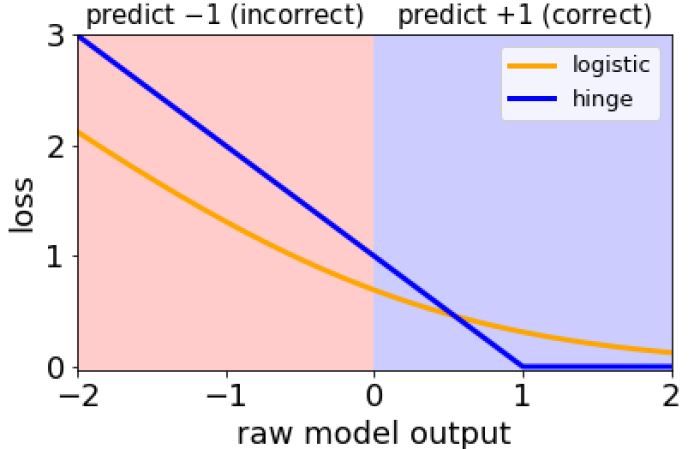
 
 <p><b>
 <ul>
     <li> Support vector: a training example not in the flat part of the loss diagram</li>
     <li>Support vector: an example that is incorrectly classified or close to the boundary</li>
     <li>If an example is not a support vector, removing it has no effect on the model</li>
     <li>Having a small number of support vectors makes kernel SVMs really fast</li>
    </ul></b></p>

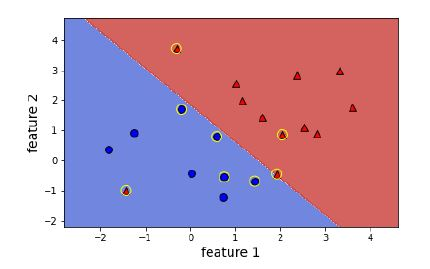

## Max-margin viewpoint

<p><b><ul>
    <li>The SVM maximizes the "margin" for linearly separable datasets</li>
    <li>Margin: distance from the boundary to the closest points</li>
    </ul></b></p>
    
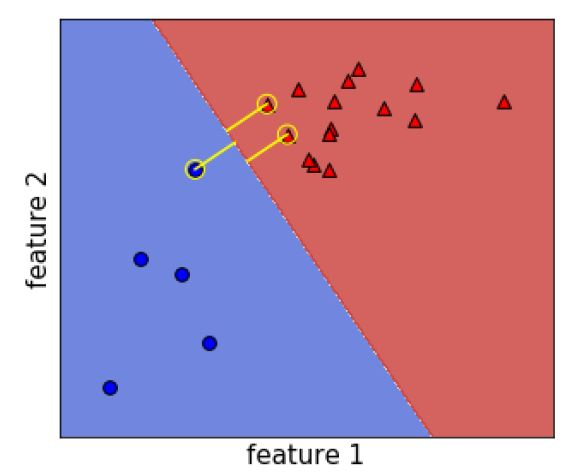